In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

In [33]:
inputs = np.array([[0, 0,], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])
# Seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_layer_neurons = inputs.shape[1]   # Number of features in input layer (2)
hidden_layer_neurons = 2   # Number of neurons in hidden layer
output_neuron = 1          # Number of neurons in output layer

# Weights and biases initialization
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))

output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neuron))


In [34]:
# Learning rate
lr = 0.1

# Training the MLP
error_list = []  # To store the error at each iteration
epochs = 200000
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(inputs, hidden_weights) 
    hidden_layer_activation = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_activation, output_weights) 
    predicted_output = sigmoid(output_layer_input)
    
    # Backpropagation
    error = outputs - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)
    
    # Updating Weights and Biases
    output_weights += hidden_layer_activation.T.dot(d_predicted_output) * lr
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    
    
    # Store the error at each iteration
    error_list.append(np.mean(np.abs(error)))

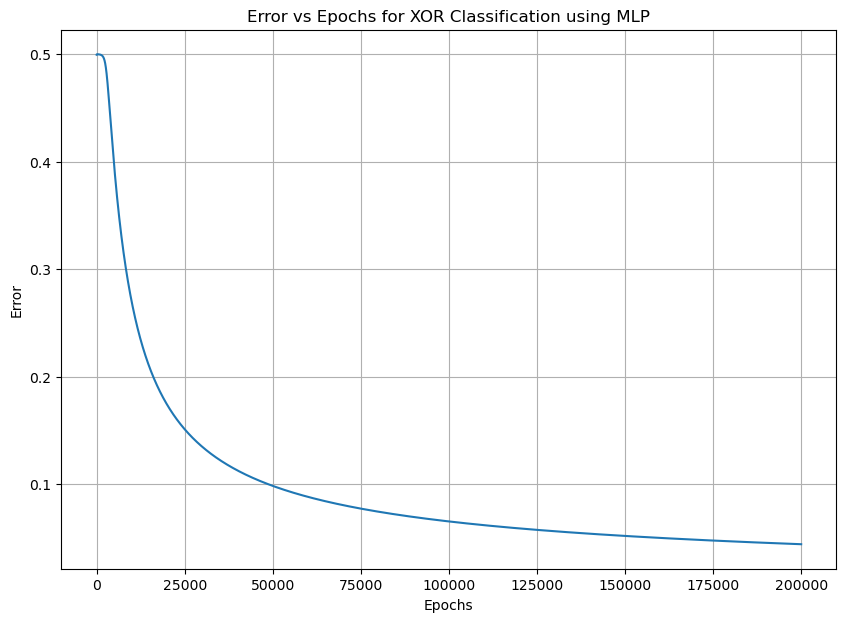

Final Predictions:
[[0.01977423]
 [0.95323317]
 [0.95323319]
 [0.06257099]]


In [35]:
# Plot the error over epochs
plt.figure(figsize=(10, 7))
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs for XOR Classification using MLP')
plt.grid(True)
plt.show()

# Output final predictions
print("Final Predictions:")
print(predicted_output)